<a href="https://colab.research.google.com/github/LordMelodias/Data-Analytics/blob/main/movierecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommendation System

To create a movie recommendation system, we can use various approaches like Content-Based Filtering and Collaborative Filtering depending on the data we have and the type of recommendations we want to make.
I Use Content-Based Filtering:


**Content-Based Filtering**: Recommends movies similar to what the user has liked before based on the attributes of the movies, such as genre, director, actors, etc.

**Steps:**

**Feature Extraction:** Extract features like Movie_Genre, Movie_Language, Movie_Director, etc.

**Similarity Calculation:** Use techniques like Cosine Similarity, Euclidean Distance, or other similarity metrics to compare movies based on their features.

**Recommendation:** Recommend movies with the highest similarity scores to those the user liked.



#Import Library

In [5]:
import pandas as pd

#Import Dataset

In [6]:
movie = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')
movie.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [8]:
movie.shape

(4760, 21)

#Get Feature Selection

In [9]:
movie.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [10]:
X = movie[['Movie_Genre','Movie_Keywords', 'Movie_Tagline', 'Movie_Cast','Movie_Director']].fillna('')
# fillna used to replace value of NaN

In [11]:
X.shape

(4760, 5)

In [12]:
X

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


In [13]:
# Combine Feature this allows the model to consider all aspects together when calculating similarity.
data = X['Movie_Genre'] + ' ' + X['Movie_Keywords'] + ' ' + X['Movie_Tagline'] + ' ' + X['Movie_Cast'] + ' ' + X['Movie_Director']

In [14]:
data[0]

"Crime Comedy hotel new year's eve witch bet hotel room Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who's in for the wildest New year's Eve of his life. Tim Roth Antonio Banderas Jennifer Beals Madonna Marisa Tomei Allison Anders"

# Text Cleaning
Convert the text to lowercase, remove stopwords, and perform stemming. This will help in better matching of text.

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
# Download stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    ps = PorterStemmer()  # Initialize stemmer (that are not stopwords)
    # ps.stem(word) applies stemming, which reduces the word to its root form. For example, "running" might be stemmed to "run."
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stopwords.words('english')]) #The code removes stopwords from the text like "the," "and," "in," and "is"
    return text

data = data.apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data[0]

'crime comedi hotel new year eve witch bet hotel room twelv outrag guest four scandal request one lone bellhop first day job wildest new year eve life tim roth antonio bandera jennif beal madonna marisa tomei allison ander'

In [19]:
data.shape

(4760,)

#Get Feature Text Conversion to Tokens
Convert the cleaned text into numerical data using TF-IDF which will give importance to words that are more unique across the dataset.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer()

In [22]:
tfidf_matrix = tfidf.fit_transform(data)

In [23]:
print(tfidf_matrix)

  (0, 547)	0.1765050929137724
  (0, 434)	0.15480743671010957
  (0, 13696)	0.158366273321696
  (0, 8576)	0.15372835887134306
  (0, 8382)	0.17936430605198983
  (0, 1244)	0.1765050929137724
  (0, 6900)	0.10589515357473957
  (0, 1088)	0.14983600027184973
  (0, 645)	0.14496466811672956
  (0, 11629)	0.15480743671010957
  (0, 13641)	0.11322444586045101
  (0, 8016)	0.09367192409834293
  (0, 14899)	0.1907737636556277
  (0, 6972)	0.14353630001781534
  (0, 3439)	0.12439629712083984
  (0, 4830)	0.12377382059782528
  (0, 1329)	0.21301695414907507
  (0, 8152)	0.16410467101370507
  (0, 10013)	0.08892215080645219
  (0, 11317)	0.21301695414907507
  (0, 11971)	0.16757848037807793
  (0, 4971)	0.158366273321696
  (0, 5703)	0.1765050929137724
  (0, 10111)	0.20317418555569508
  (0, 13941)	0.1907737636556277
  :	:
  (4757, 12223)	0.1602708260256832
  (4757, 9738)	0.19338657080148303
  (4757, 4795)	0.13381760451368369
  (4757, 2662)	0.16958202645873172
  (4757, 7484)	0.2529071553323405
  (4757, 12953)	0.16237

In [24]:
tfidf_matrix.shape

(4760, 15338)

#Cosine Similarity

Example (How it works):
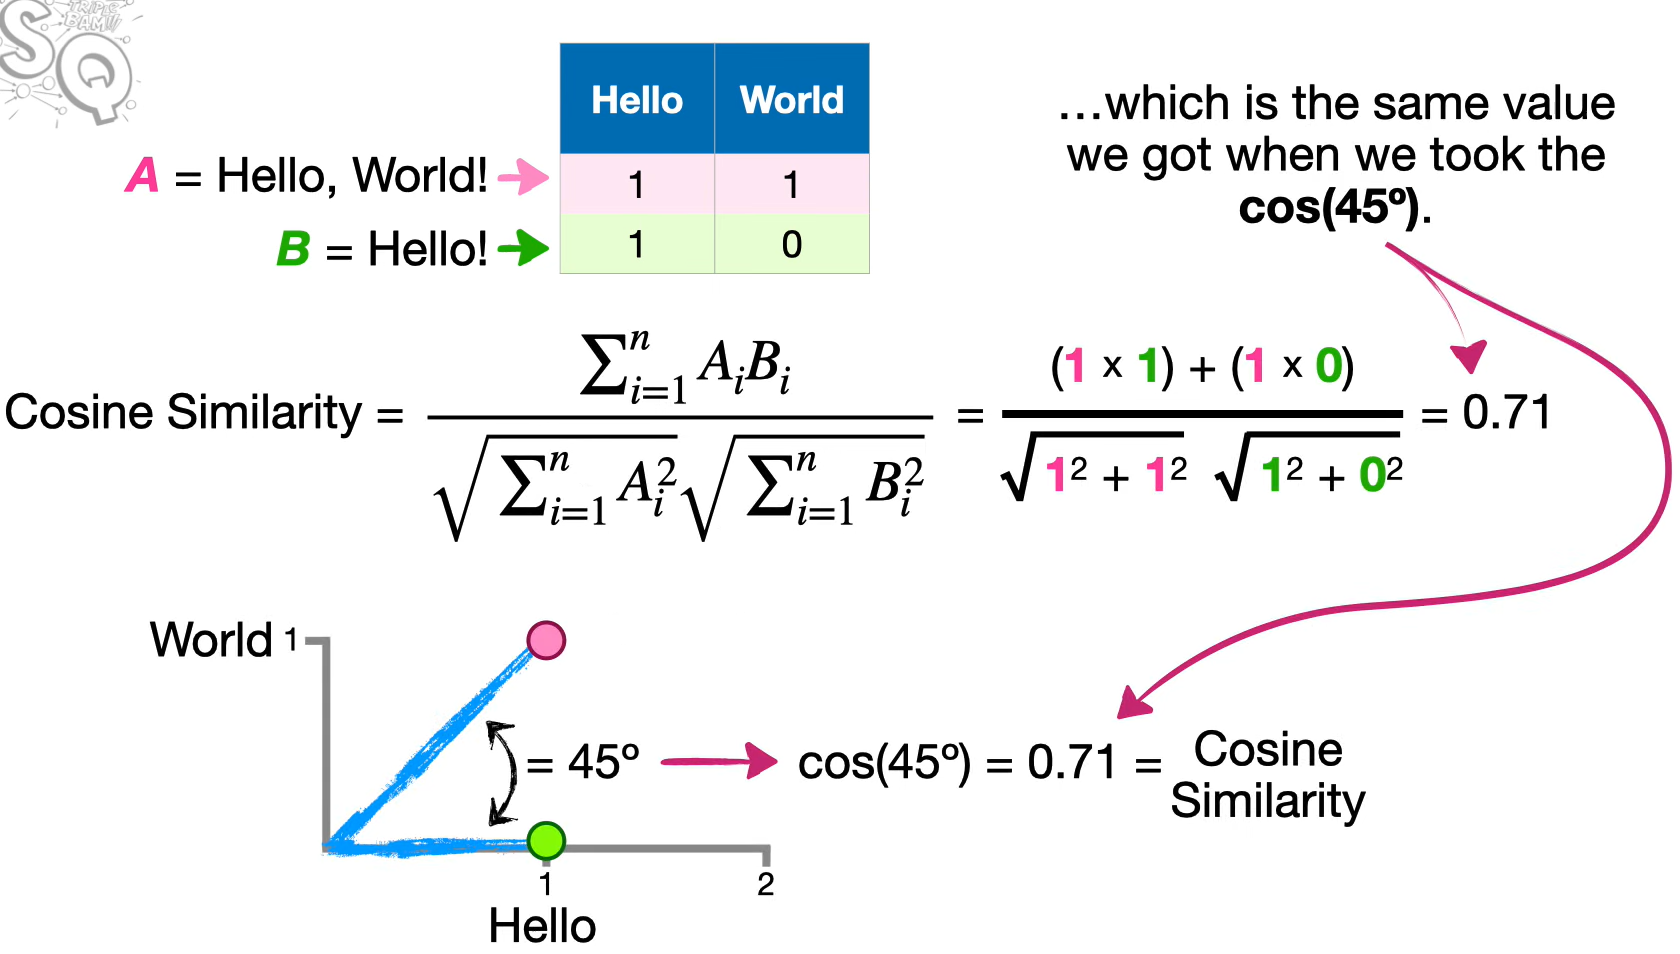

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [27]:
cosine_sim

array([[1.        , 0.        , 0.00921572, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00921572, 0.        , 1.        , ..., 0.        , 0.08441324,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08441324, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#Check Similarity Score Between Two Movie

In [28]:
def get_movie_index(title):
    return movie[movie['Movie_Title'] == title].index[0]

In [29]:
def get_similarity_score(movie1, movie2):
    idx1 = get_movie_index(movie1)
    idx2 = get_movie_index(movie2)

    # Get the similarity score from the cosine similarity matrix
    similarity_score = cosine_sim[idx1][idx2]

    return similarity_score

In [30]:
# Example usage
movie1 = 'Alien'
movie2 = 'Moonraker'
similarity_score = get_similarity_score(movie1, movie2)

print(f"Similarity Score between '{movie1}' and '{movie2}': {similarity_score:.2f}")

Similarity Score between 'Alien' and 'Moonraker': 0.29


# Recommend Movie

In [31]:
# Function to get the index of a movie title
def get_movie_name(title):
    return movie[movie['Movie_Title'] == title].index[0]

In [32]:
# Function to get the most similar movie to a specific movie
def get_similar_movie(base_movie):
    base_idx = get_movie_index(base_movie)

    # Get similarity scores for the base movie
    similarity_scores = cosine_sim[base_idx]

    # Create a DataFrame with movie titles and similarity scores
    scores_df = pd.DataFrame({
        'Movie_Title': movie['Movie_Title'],
        'Similarity_Score': similarity_scores
    })

    # Exclude the base movie itself
    scores_df = scores_df[scores_df['Movie_Title'] != base_movie]

    # Get the movie with the highest similarity score
    most_similar_movie = scores_df.loc[scores_df['Similarity_Score'].idxmax()]

    return most_similar_movie

In [33]:
#Movie Name
base_movie = 'Avatar'
most_similar_movie = get_similar_movie(base_movie)

# Print the most similar movie
print(f"The movie most similar to '{base_movie}' is '{most_similar_movie['Movie_Title']}' with a similarity score of {most_similar_movie['Similarity_Score']:.2f}.")

The movie most similar to 'Avatar' is 'Alien' with a similarity score of 0.26.


#Written 10 most similar movies

In [34]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = movie[movie['Movie_Title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    # Sorts the list of similarity scores in descending order based on the score values, so the most similar movies come first.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    # Extracts the indices of the top 10 similar movies from the sorted list.
    movie_indices = [i[0] for i in sim_scores]
    movie_scores = [i[1] for i in sim_scores]

    # Return the top 10 most similar movies
    #return movie['Movie_Title'].iloc[movie_indices]

    top_movies =  movie['Movie_Title'].iloc[movie_indices]

    return top_movies, movie_scores
    #print(get_recommendations('Alien'))


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-36-e23c7db62103>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similarity_Score', y='Movie_Title', data=recommendations_df, palette='viridis')


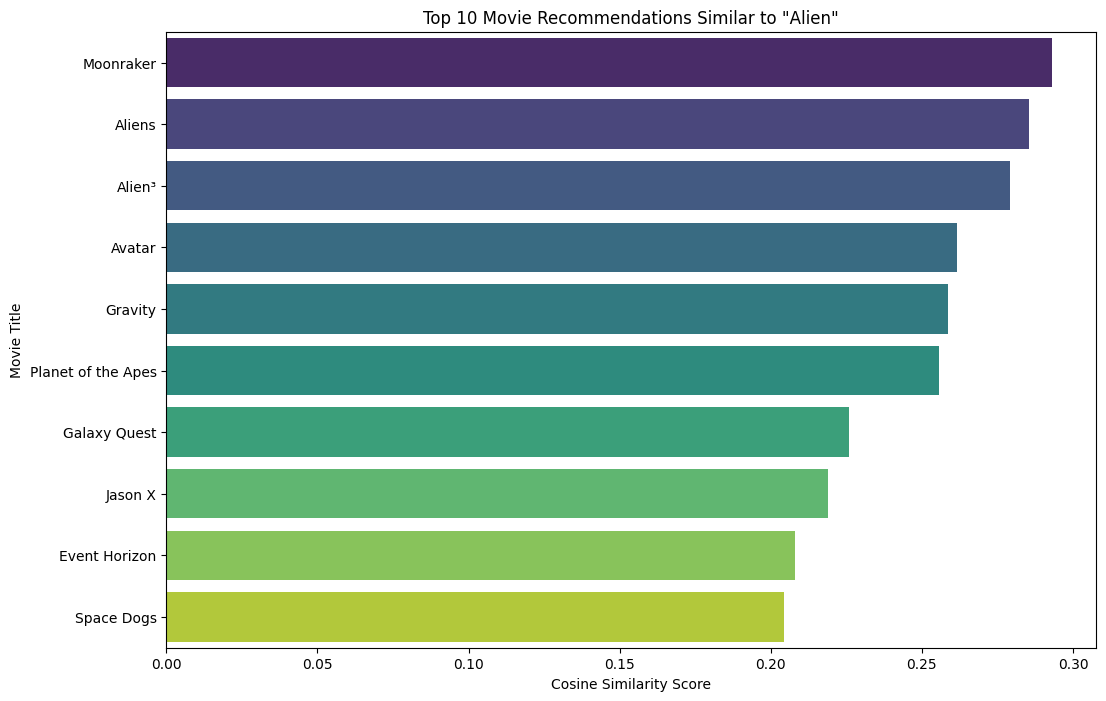

In [36]:
# Get recommendations for a specific movie
title = 'Alien'
top_movies, movie_scores = get_recommendations(title)

# Prepare data for plotting
recommendations_df = pd.DataFrame({
    'Movie_Title': top_movies,
    'Similarity_Score': movie_scores,
})

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Similarity_Score', y='Movie_Title', data=recommendations_df, palette='viridis')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Movie Title')
plt.title(f'Top 10 Movie Recommendations Similar to "{title}"')
plt.show()


#Explanation

The methods used for calculating similarity scores and identifying the most similar movies are efficient, ensuring that recommendations are both relevant and accurate. This approach can be scaled to handle large datasets, making it suitable for real-world applications.
